# This notebook contains the work for Step 5 of the Data Science Method. It also contains the prep work which was completed in Step 4:

# The Data Science Method

1.Problem Identification

2.Data Wrangling

  
   - Data Collection
   - Data Organization
   - Data Definition
   - Data Cleaning
 

3.Exploratory Data Analysis


   - Build data profile tables and plots
   - Outliers & Anomalies
   - Explore data relationships
   - Identification and creation of features


4.Pre-processing and Training Data Development


   - Create dummy or indicator features for categorical variables
   - Standardize the magnitude of numeric features
   - Split into testing and training datasets
   - Apply scaler to the testing set


5. Modeling

   - Fit Models with Training Data Set
   - Review Model Outcomes — Iterate over additional models as needed.
   - Identify the Final Model

Documentation


   - Review the Results
   - Present and share your findings - storytelling
   - Finalize Code
   - Finalize Documentation


# Introduction

In this project, several anomaly detection techniques of sklearn package have been explored to train a machince learning model to detect credict card fraud. Methods such as Local outlier factor and isolation forest algorithm was used to calculate the anomaly scores. These algorithms use a dataset of slightly under 30000 credit card transactions to predict a fradualent transaction.

Before, proceeding with the project, an attempt to briefly describe the anomaly detection and the detection techniques would be made.

What is Anomaly detection?

Anomaly detection is a technique used to identify unusual patterns that do not conform to expected behavior, called outliers. It has many applications in business, from intrusion detection (identifying strange patterns in network traffic that could signal a hack) to system health monitoring (spotting a malignant tumor in an MRI scan), and from fraud detection in credit card transactions to fault detection in operating environments.

Anomalies can be broadly categorized as: Point anomalies: A single instance of data is anomalous if it's too far off from the rest. Business use case- Detecting credit card fraud based on "amount spent."

Contextual anomalies: The abnormality is context specific. This type of anomaly is common in time-series data. Business use case- Spending $100 on food every day during the holiday season is normal, but may be odd otherwise.

Collective anomalies: A set of data instances collectively helps in detecting anomalies. Business use case- Someone is trying to copy data form a remote machine to a local host unexpectedly, an anomaly that would be flagged as a potential cyber attack.

Anomaly Detection Techniques:

Simple Statistical Methods- Metrics such as distribution, including mean, median, mode, and quantiles could be used to identify outliers since the definition of an anomalous data point is one that deviates by a certain standard deviation from the mean.

Machine Learning-Based Approaches- Density-Based Anomaly Detection-: These include the k-nearest neighbors algorithm, Relative density of data based method known as local outlier factor (LOF) algorithm Clustering-Based Anomaly Detection-: K-means algorithm Support Vector Machine-Based Anomaly Detection Isolation Forest Algorithm

What is Local Outlier Factor algorithm?

LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

What is Isolation forest algorithm?

Isolation Forest explicitly identifies anomalies instead of profiling normal data points. Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.

In principle, outliers are less frequent than regular observations and are different from them in terms of values (they lie further away from the regular observations in the feature space). That is why by using such random partitioning they should be identified closer to the root of the tree (shorter average path length, i.e., the number of edges an observation must pass in the tree going from the root to the terminal node), with fewer splits necessary.

# STEP 4: Pre-processing and Training Data Development

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pprint import pprint 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from flask import Flask, render_template

#importing saperate functions from pandas
from pandas import read_csv, value_counts

In [2]:
# set options
pd.set_option('display.max_rows', 500)

In [3]:
# load the data saved from step 3
df=pd.read_csv('C:\\Users\\arna_mora\\Springboard\\unit 7\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(283726, 30)
(283726,)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (198608, 30)
Number transactions y_train dataset:  (198608,)
Number transactions X_test dataset:  (85118, 30)
Number transactions y_test dataset:  (85118,)


# Normalizing the amount column. The amount column is not in line with the anonimised features

In [7]:
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


# Resampling:

As we mentioned earlier, there are several ways to resample skewed data. Apart from under and over sampling, there is a very popular approach called SMOTE (Synthetic Minority Over-Sampling Technique), which is a combination of oversampling and undersampling, but the oversampling approach is not by replicating minority class but constructing new minority class data instance via an algorithm.

Applying SMOTE with Over Sampling

In [8]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 344
Before OverSampling, counts of label '0': 198264 

After OverSampling, the shape of X_train: (396528, 30)
After OverSampling, the shape of y_train: (396528,) 

After OverSampling, counts of label '1': 198264
After OverSampling, counts of label '0': 198264


It should be clear that SMOTE has balanced our data completely, and that the minority class is now equal in size to the majority class.

Model Prediction:

# Random Forest Classifier with SMOTE 

In [10]:
# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
rf = RandomForestClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', rf)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Predict probabilities
probs = rf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print(accuracy_score(y_test, y_predicted))
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
# Obtain the results from the classification report and confusion matrix 

print('Classifcation report:\n', classification_report(y_test, y_predicted))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

0.9995183157499001
AUC ROC score:  0.95801011549055
Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.90      0.77      0.83       129

    accuracy                           1.00     85118
   macro avg       0.95      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118

Confusion matrix:
 [[84978    11]
 [   30    99]]


With the Random Forest Classifier with SMOTE Model, we have:

- The model is able to predict only 92% of fraudulent transactions .(precision score)

- 84989 transactions classified as valid and were actually valid(True Positive)(here 84980 are the number of CORRECTLY PREDICTED safe cases).

- 13 transactions classified as fraud but that were really valid(type 1 error)( here 9 are the number of MISCLASSIFIED safe cases. Hence 9 safe cases were misclassified as a fraud. This is potentially less dangerous as it’s better to stop some safe transactions with the slightest chance of fraud.;

- 29 transactions classified as valid but which were fraud (type 2 error)(here 30 are the number of MISCLASSIFIED fraud cases. hence 30 fraud cases were misclassified as safe. This is very dangerous because we are letting the fraud cases pass through. This can cause a huge loss to the organization.;

- 100 transactions classified as fraud and were actually fraud.

- we have 129 transactions as fraud.

- Look at the precision, recall, f1_score .The accuracy looks good.

- AUC denotes an excellent classifier(0.96).

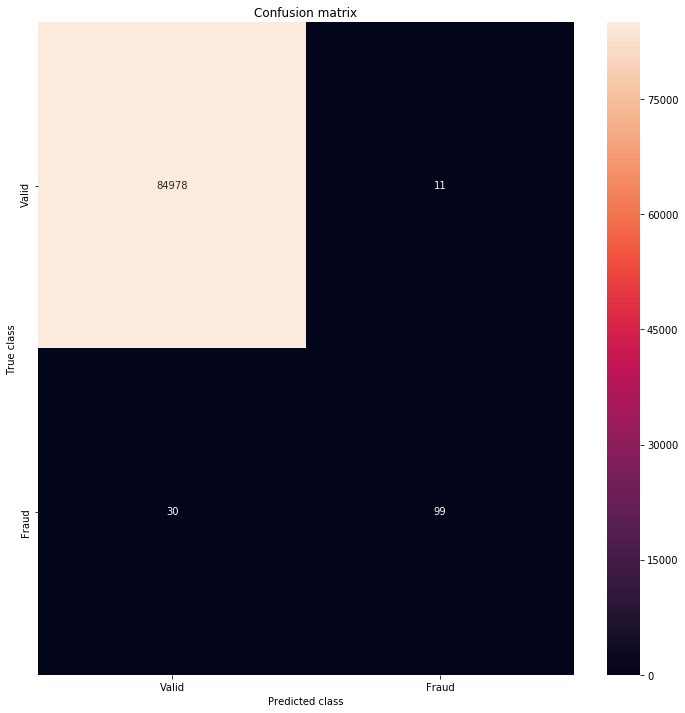

In [11]:
# printing the confusion matrix 
LABELS = ['Valid', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, y_predicted) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In Confusion matrix, 99 out of 129 fraud cases are detected, 30 cases are not detected and 11 false positive are identified.

# Plotting the Precision vs. Recall Curve

You can also plot a Precision-Recall curve, to investigate the trade-off between the two in your model. In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa. A balance between these two needs to be achieved in your model, otherwise you might end up with many false positives, or not enough actual fraud cases caught. To achieve this and to compare performance, the precision-recall curves come in handy.



In [49]:
# Obtain precision and recall 
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, predicted)
print(f'Precision: {precision}\nRecall: {recall}')

Precision: [0.00151554 0.93814433 1.        ]
Recall: [1.         0.70542636 0.        ]


def plot_pr_curve

In [50]:
def plot_pr_curve(recall, precision, average_precision):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
    """
    from inspect import signature
    plt.figure()
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title(f'2-class Precision-Recall curve: AP={average_precision:0.2f}')
    return plt.show()

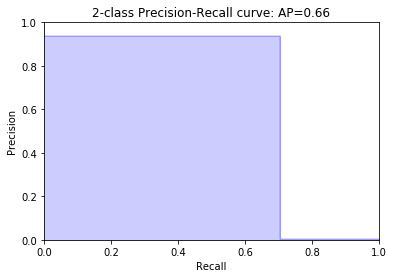

In [51]:
# Plot the recall precision tradeoff
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted)
plot_pr_curve(recall, precision, average_precision)

Define predictors and target values


Let's also visualize the features importance.

In [10]:
target = 'Class'
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'normAmount']

In [11]:
rf.fit(df[columns], df[target].values)

RandomForestClassifier()

In [12]:
preds = rf.predict(df[columns])

# Features importance

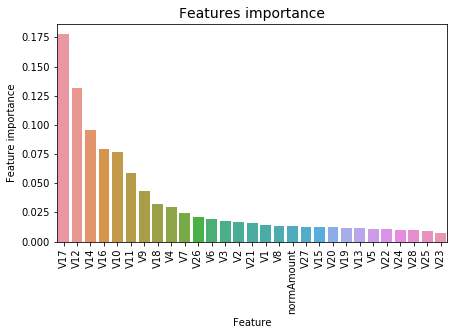

In [13]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
tmp = pd.DataFrame({'Feature': columns, 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

We can observe that variables V12, V17, V14 of which importances are all greater than 0.1 , coincide with our previous conjecture in Exploratory Data Analysis.Also, the importances of V10, V11, V16 are all around 0.5 which indicates that they are relatively important in this data. The rest of variables perform constant low importances. Therefore, V12, V17 and V14 are important for classifying whether a transaction is fraudulent.

# Model : Isolation Forest, Local Outlier Factor(LOF) Algorithm

In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1
fraud = df[df['Class']==1]
Valid = df[df['Class']==0]
outlier_fraction = len(fraud)/float(len(Valid))

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
#20 is default, but the higher the percentage of outliers in your in your data set the
#higher you're going to want to make this number

In [17]:
# Fit the model
from sklearn.metrics import confusion_matrix
classifier = {"Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}
plt.figure(figsize=(9, 7))
n_outliers = len(fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
    print(classification_report(Y, y_pred))
    print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_predicted))

Isolation Forest: 659
0.9976773365852971
AUC ROC score:  0.9580515709237702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.30      0.30      0.30       473

    accuracy                           1.00    283726
   macro avg       0.65      0.65      0.65    283726
weighted avg       1.00      1.00      1.00    283726

Confusion matrix:
 [[84976    13]
 [   29   100]]
Local Outlier Factor: 907
0.9968032538434969
AUC ROC score:  0.9580515709237702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.04      0.04      0.04       473

    accuracy                           1.00    283726
   macro avg       0.52      0.52      0.52    283726
weighted avg       1.00      1.00      1.00    283726

Confusion matrix:
 [[84976    13]
 [   29   100]]


<Figure size 648x504 with 0 Axes>

Observations :

- The IF Model is detecting fraud transactions 0.30 and LOF Model is detecting fraud transactions 0.04;

- Isolation Forest detected 659 errors versus Local Outlier Factor detecting 907 errors.

- Isolation Forest has a 99.76% more accurate than LOF of 99.66%.

- When comparing error precision & recall for 2 models , the Isolation Forest performed much better than the LOF as we can see   
  that the detection of fraud cases is 28 % versus LOF detection rate of just 0 %.

- So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

- We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of 

  computational expense. We can also use complex anomaly detection models to get better accuracy in determining more fraudulent   
  cases.
  
  

With Isolation Forest, Local Outlier Factor Models, we have:

- 84976 transactions classified as valid and were actually valid(True Positive);

- 13 transactions classified as fraud but that were really valid(type 1 error);

- 29 transactions classified as valid but which were fraud (type 2 error);

- 100 transactions classified as fraud and were actually fraud.

- Look at the precision, recall, f1_score .The accuracy looks good.





# Building the XGBoost Model

In [23]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=0)
xg.fit(X_train,y_train)
xg.score(X_train,y_train)
print('{}: {}'.format(xg, n_errors))

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None): 907


Validating on test data

In [24]:
pred = xg.predict(X_test)

Checking Accuracy

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(pred,y_test)
cm

array([[84981,    29],
       [    8,   100]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.9995653093352758

In [27]:
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
print (classification_report(y_test, pred))

AUC ROC score:  0.9580515709237702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.93      0.78      0.84       129

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



With the XGboost  Model, we have:


- This Model is detecting fraud transactions 0.93 ;

- 84981 transactions classified as valid and were actually valid(True Positive);

- 8 transactions classified as fraud but that were really valid(type 1 error);

- 29 transactions classified as valid but which were fraud (type 2 error);

- 100 transactions classified as fraud and were actually fraud.

- Look at the precision, recall, f1_score .all are higher than from prevois model and also the accuracy is excellent.

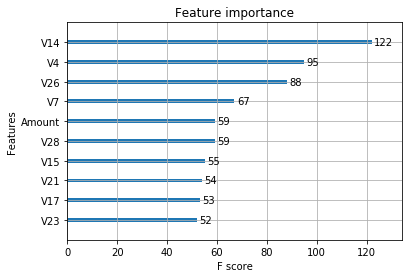

In [28]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
import matplotlib.pylab as plt
from matplotlib import pyplot
from xgboost import plot_importance
plot_importance(xg, max_num_features=10) # top 10 most important features
plt.show()


The most important features are V14, V4, V26, V7. (highest scores)

Text(0, 0.5, 'Precision')

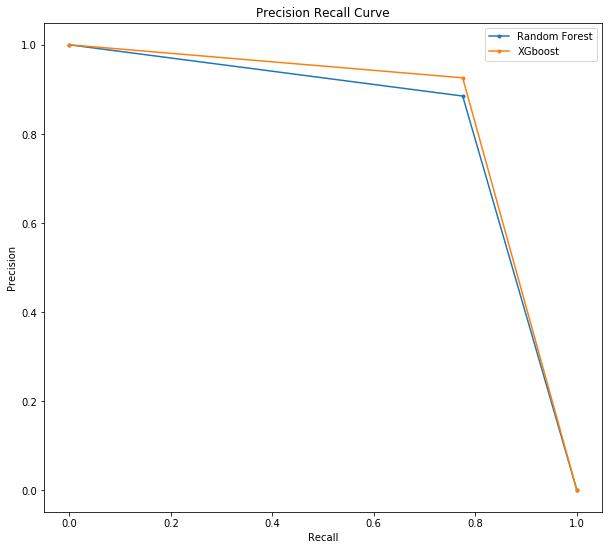

In [29]:
from sklearn.metrics import precision_recall_curve
plt.figure(figsize = (10,9))
precision_rf, recal_rf,_ = precision_recall_curve(y_test, y_predicted)
precision_xg, recal_xg, _ = precision_recall_curve(y_test,pred)

plt.plot(recal_rf, precision_rf, label = 'Random Forest', marker = '.')
plt.plot(recal_xg, precision_xg, label= 'XGboost', marker = '.')

plt.legend()
plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

# Hyperparameter tuning

In [15]:
model = RandomForestClassifier(n_estimators=10, 
                               criterion='gini', 
                               max_depth=None, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               max_features='auto', 
                               n_jobs=-1, class_weight=None)

we adjust model parameter to optimize for fraud detection.

# Model adjustments

A simple way to adjust the random forest model to deal with highly imbalanced fraud data, is to use the class_weights option when defining the sklearn model.

In [23]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5, n_estimators=100)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print('ROC Score:')
print(roc_auc_score(y_test, probs[:,1]))
print('\nClassification Report:')
print(classification_report(y_test, predicted))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predicted))

ROC Score:
0.9518853830696374

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.94      0.71      0.81       129

    accuracy                           1.00     85118
   macro avg       0.97      0.85      0.90     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84983     6]
 [   38    91]]


we have now 5 less false positive and now 38 instead of 30 false negatives cases we are not catching.we mostly care about catching fraud, and not so much about the false positives, this does actually not improve our model at all.

# Adjusting RF for fraud detection

In [24]:
# def get_model_results
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [25]:
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.9801904596682416

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.78      0.79      0.78       129

    accuracy                           1.00     85118
   macro avg       0.89      0.90      0.89     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84960    29]
 [   27   102]]


As you can see here, I've reduced the number of false negative and catching more cases of fraud and also false positive increased.

# Parameter optimization with GridSearchCV

With GridSearchCV you can define which performance metric to score the options on. Since for fraud detection we are mostly interested in catching as many fraud cases as possible, we can optimize our model settings to get the best possible Recall score. 

In [26]:
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 30}

# Model results with GridSearchCV

In [27]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=8,
                               max_features='log2', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.963409400632877

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.76      0.78      0.77       129

    accuracy                           1.00     85118
   macro avg       0.88      0.89      0.89     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84957    32]
 [   28   101]]


it didn't improve.

# Ensemble methods


- Ensemble methods are techniques that create multiple machine learning models and then combine them to produce a final result.
  Usually produce more accurate predictions than a single model.
  
- Ensemble methods take a myriad of models into account and average them to produce one final model
  -Less likely to be the result of overfitting
  -Can improve prediction performance














# Stacking Ensemble Methods


- Multiple models are combined via a "voting" rule on the model outcome


# Voting Classifier


In [29]:
from sklearn.ensemble import VotingClassifier

In [31]:
# Define Models
from xgboost import XGBClassifier
clf1 = RandomForestClassifier(random_state=1)
clf2 = XGBClassifier(random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [32]:
# Combine models into ensemble
ensemble_model = VotingClassifier(estimators=[('rf', clf1), ('xg', clf2)], voting='hard')

In [33]:
# Fit and predict as with other models
ensemble_model.fit(X_train, y_train)
ensemble_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

- the voting='hard' option uses the predicted class labels and takes the majority vote
- the voting='soft' option takes the average probability by combining the predicted probabilities of the individual models.

# XGBoost Model

In [34]:
# Define the Logistic Regression model with weights
model = XGBClassifier(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

[14:16:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


ROC Score:
0.9766898242462932

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.93      0.78      0.84       129

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84981     8]
 [   29   100]]


As you can see the XGBoost has quite different performance from the Random Forest. less false positives, but also a better precision. 

# Voting Classifier

In [35]:
# Define the three classifiers to use in the ensemble

clf1 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=5)

clf2 = XGBClassifier(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')


# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf1), ('xg', clf2)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

[14:24:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.95      0.75      0.84       129

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84984     5]
 [   32    97]]


here we have 5 false positive which is 3 less than previous. I do care about catching as many fraud cases as I can, whilst keeping the false positives low, this is a pretty good trade-off. 

# Adjusting weights within the Voting Classifier

In [37]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf1), ('xg', clf2)], voting='soft', weights=[1, 4], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

[14:38:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight, solver } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


ROC Score:
0.972663585009314

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.92      0.78      0.84       129

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118


Confusion Matrix:
[[84980     9]
 [   29   100]]


here we have 9 false positive which is 4 more than previous.
Precision is high because of reducing of false positive.


# CONCLUSION:

- The highest values of Valid transactions are 25691.16 while of Fraudulent transactions are just 2125.87.

- The average value of Valid transactions are small(USD 88.41) than fraudulent transactions that is USD 123.87.

- I would like to choose XGBoost method, because this method has less false positive.
 
- So overal XGBoost Method performed much better in deterining in fraud cases which is around 90% .

- The Precision in XGBoost method is more than of Random Forest.(we have less false pasitive which is 5)
